## 利用KNN算法对鸢尾花进行分类

### 实现流程：
- 1. 加载数据集
- 2. 数据预处理
- 3. 特征工程（特征提取、标准化...）
- 4. 模型训练
- 5. 模型预测与评估

#### **第一步：** 从`sklearn.datasets`中获取iris数据集

In [1]:
from sklearn.datasets import load_iris

# 加载鸢尾花数据集，返回特征和标签
iris = load_iris()  
X = iris.data		# 特征：4个特征 - 花萼长度、花萼宽度、花瓣长度、花瓣宽度
y = iris.target	    # 标签：3种鸢尾花 - setosa、versicolor、virginica

print(f"数据集中的所有键：{iris.keys()}")
print(f'数据集形状：{X.shape}')
print(f'标签形状：{y.shape}\n')
print(f'特征名称：{iris.feature_names}')
print(f'样本数据（前5行）：\n{X[:5]}\n')  # 只打印前5行
print(f'目标名称：{iris.target_names}')
print(f'样本标签（前5个）：{y[:5]}')  # 只打印前5个标签


数据集中的所有键：dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
数据集形状：(150, 4)
标签形状：(150,)

特征名称：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
样本数据（前5行）：
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

目标名称：['setosa' 'versicolor' 'virginica']
样本标签（前5个）：[0 0 0 0 0]


![image](https://photo.20061204.xyz/file/AgACAgUAAyEGAASlJlL_AAMLaX4C-8TwnIm5yutrKJHOSIQXgiEAApwNaxsSovFXUFLmvtyBAAH9AQADAgADeQADOAQ.png)

##### 可视化数据集


iris_d（前5行）-->
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


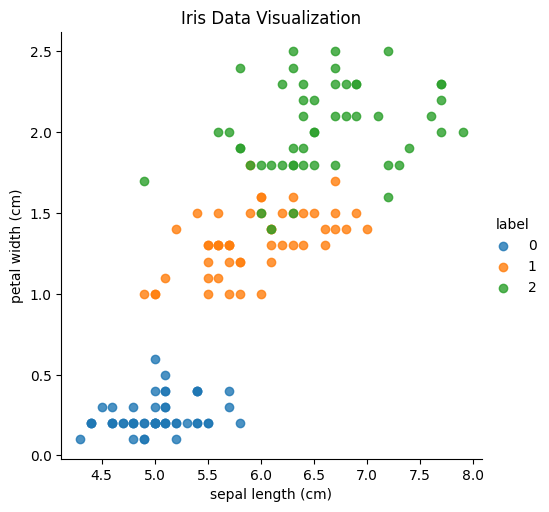

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# 显示鸢尾花数据
def showIris():

    # 1 加载鸢尾花数据集
    mydataset = load_iris()

    # 2 将数据转换成DataFrame格式，设置data和columns属性，设置目标值名称
    iris_d = pd.DataFrame(mydataset['data'], columns=mydataset.feature_names)
    iris_d['label'] = mydataset.target
    print('\niris_d（前5行）-->\n', iris_d[:5])  # 显示前5行数据
    col1 = 'sepal length (cm)'
    col2 = 'petal width (cm)'

    # 3 使用sns.lmplot()进行显示
    sns.lmplot(x=col1, y=col2, data=iris_d, hue='label', fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris Data Visualization')
    plt.show()


showIris()


#### **第二步：** 数据预处理

In [3]:
# 数据集划分
from sklearn.model_selection import train_test_split

# 从150个样本中划分出20%作为测试集，80%作为训练集
# 参数说明：
# X: 特征数据
# y: 标签数据
# test_size: 测试集所占比例，这里是20%
# random_state: 随机种子，保证每次划分结果相同
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 第三步：特征工程

In [4]:
# 特征提取：由于iris数据集的特征已经是数值型的，所以这里不需要额外的特征提取步骤

# 标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   				# 创建StandardScaler对象
X_train = scaler.fit_transform(X_train) 	# 训练集标准化，使用fit_transform，先训练再转换
X_test = scaler.transform(X_test)			# 测试集标准化，这里使用transform方法，不用fit_transform


#### 第四步：模型训练

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# 创建KNN分类器对象，设置邻居数为3
knn = KNeighborsClassifier(n_neighbors=3)
# 训练KNN分类器
knn.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


#### 第五步：模型预测与评估

In [6]:
# 场景一：对之前切分的测试集进行预测
y_pred = knn.predict(X_test)
# 计算准确率
accuracy = knn.score(X_test, y_test)
print(f'\nKNN分类器在测试集上的准确率: {accuracy * 100:.2f}%')

# 场景二：对新样本进行预测
new_samples = [[5.1, 3.5, 1.4, 0.2],   # 预期类别：0 (setosa)
			   [6.7, 3.1, 4.7, 1.5],   # 预期类别：1 (versicolor)
			   [7.2, 3.6, 6.1, 2.5]]   # 预期类别：2 (virginica)
new_samples_scaled = scaler.transform(new_samples)  # 对新样本进行标准化
predictions = knn.predict(new_samples_scaled)
print('\n新样本预测结果:')
for sample, pred in zip(new_samples, predictions):
	print(f'样本 {sample} 预测类别: {pred} ({iris.target_names[pred]})')



KNN分类器在测试集上的准确率: 100.00%

新样本预测结果:
样本 [5.1, 3.5, 1.4, 0.2] 预测类别: 0 (setosa)
样本 [6.7, 3.1, 4.7, 1.5] 预测类别: 1 (versicolor)
样本 [7.2, 3.6, 6.1, 2.5] 预测类别: 2 (virginica)


### 总结
本Notebook完成了鸢尾花数据集的KNN分类流程，包括数据加载、可视化、训练集/测试集划分、特征标准化、模型训练与预测评估。结果展示了模型在测试集上的准确率，并对新样本进行了类别预测。后续可通过调整`n_neighbors`、尝试不同距离度量或使用交叉验证来进一步优化模型效果。